In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Dataset: https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset/

###### US Cars'data was scraped from AUCTION EXPORT.com. This dataset included Information about 28 brands of clean and used vehicles for sale in US. Eleven features were assembled for each car in the dataset.
-   __Price__	-Integer-	The sale price of the vehicle in the ad
-   __Years__	-Integer-	The vehicle registration year
-   __Brand__	-String-	The brand of car
-   __Model__	-String-	model of the vehicle
-   __Color__	-String-	Color of the vehicle
-   __State/City__	-String-_	The location in which the car is being available for purchase
-   __Mileage__	-Float-	miles traveled by vehicle
-   __Vin__	-String-	The vehicle identification number is a collection of 17 characters (digits and capital letters)
-   __Title Status__	-String-	This feature included binary classification, which are clean title vehicles and salvage insurance
-   __Lot__ -Integer-	A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
-   __Condition__	-String-	Time

In [4]:
data = pd.read_csv("USA_cars_datasets.csv")
data.head(20)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


Displaying the first rows allows Analysts to become familiar with the data and what informations they provides

In [4]:
data.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


The most __valuable__ indicatior in this table is `mean`. It shows what is the average number for price for average car, average mileage that its 52k. We can also see that the most expensive car in this dataset costs almost 85k and the oldest car is almost 50 years, it's from 1973.

In [5]:
print(data.columns)
cars_categorical_df = ['brand', 'model', 'title_status', 'color', 'vin', 'state', 'country', 'condition', 'lot']
cars_numerical_df = ['price', 'year', 'mileage',]

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')


__Numerical Variables__ -Variables also known as quantitative variables, represent measurable quantities and can be expressed in numerical terms.

__Categorical Variables__ - Categorical variables, also known as qualitative variables, represent categories or labels and can take on a limited, fixed number of values. These values can be either nominal or ordinal.
Some variables are difficult to unambiguously assign whether they are numeric or categorical. In our dataset, such non-identifiable variables are bedrooms, bathrooms, floors, grade, yr_built ,yr_renovated. For this variables we can categorize the data but also count basic statistics.

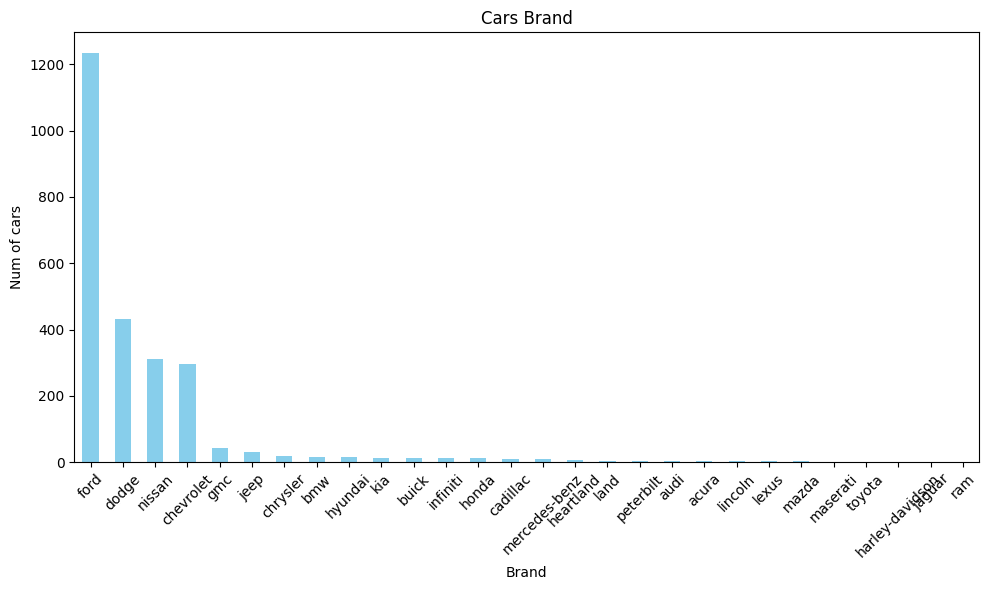

In [20]:
plt.figure(figsize=(10, 6))
brand_counts = data['brand'].value_counts()
brand_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Num of cars')
plt.title('Cars Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can observe that the most popular car in the USA is ford, dodge and nissan. Those first two are brand that came from America, that's why they are in the top tier.
Interesting thing to see is the brands tha are popular in the USA are the brands that makes the biggest fabric cars.

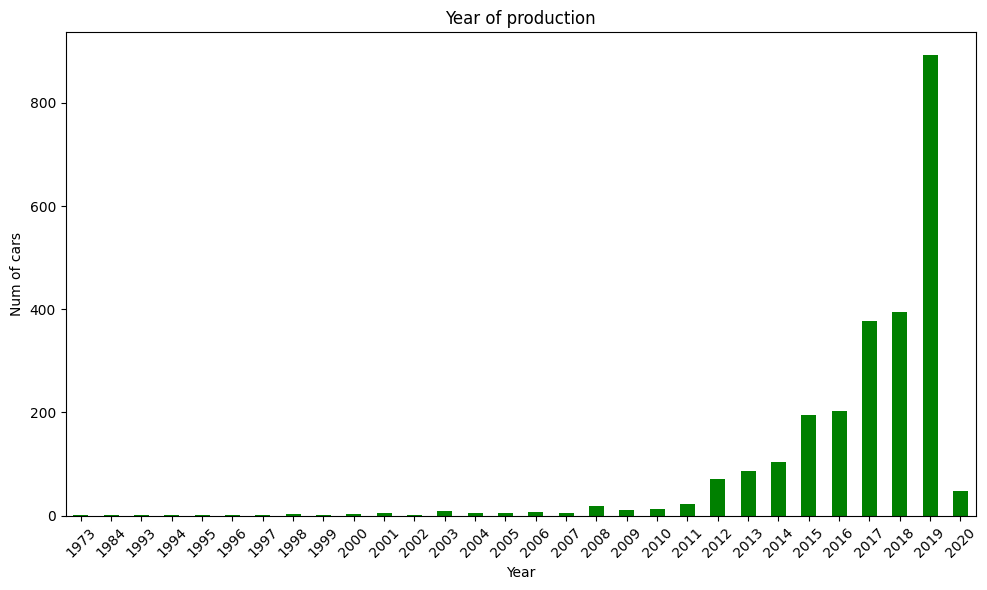

In [21]:
plt.figure(figsize=(10, 6))
year_counts = data['year'].value_counts().sort_index()
year_counts.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Num of cars')
plt.title('Year of production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that most of the cars that are for sale is from 2019 - aproximately 900, and sudenlly decreases year older and pretty linear up to 2008. (The dataset is from 4 years ago, that's why xasis is 2020 max)

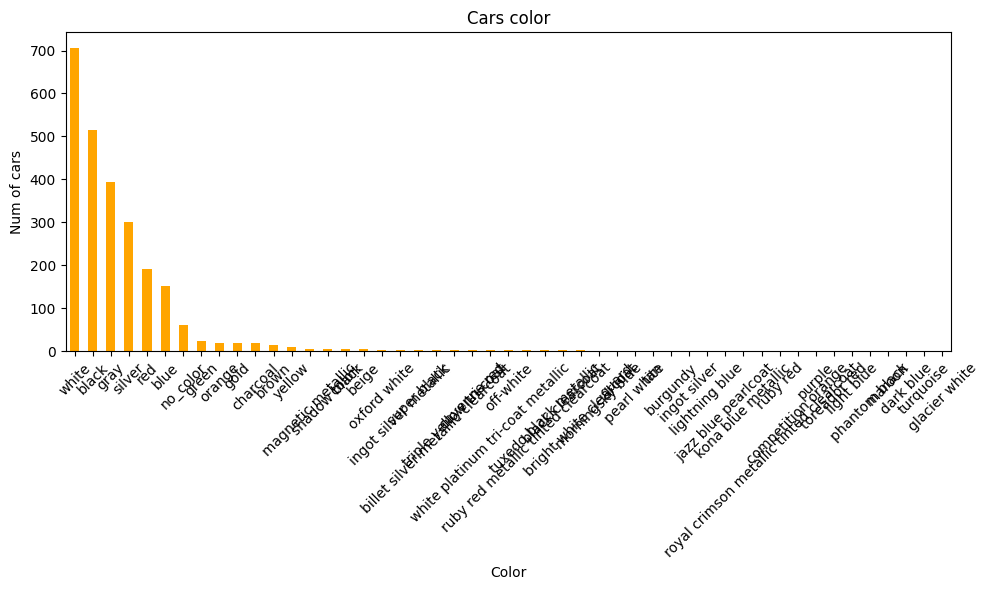

In [22]:
plt.figure(figsize=(10, 6))
color_counts = data['color'].value_counts()
color_counts.plot(kind='bar', color='orange')
plt.xlabel('Color')
plt.ylabel('Num of cars')
plt.title('Cars color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can observe that the most popular car color is white, black and gray.

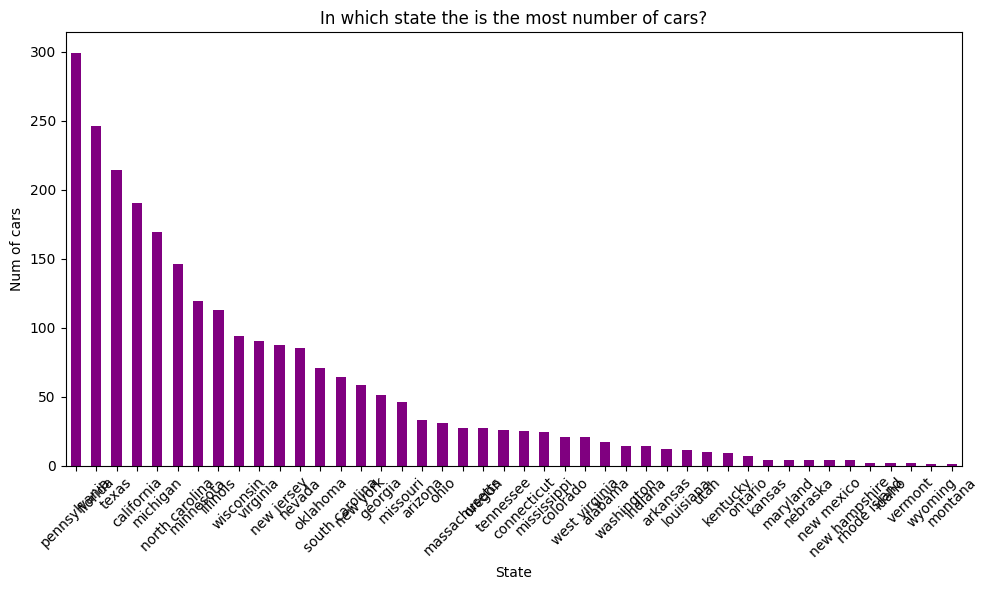

In [23]:
plt.figure(figsize=(10, 6))
state_counts = data['state'].value_counts()
state_counts.plot(kind='bar', color='purple')
plt.xlabel('State')
plt.ylabel('Num of cars')
plt.title('In which state the is the most number of cars?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart allows for a quick identification of the state with the highest number of cars, which can be valuable in analyzing the car market in different regions. The bigest number of cars for sell is in pensylvania state.

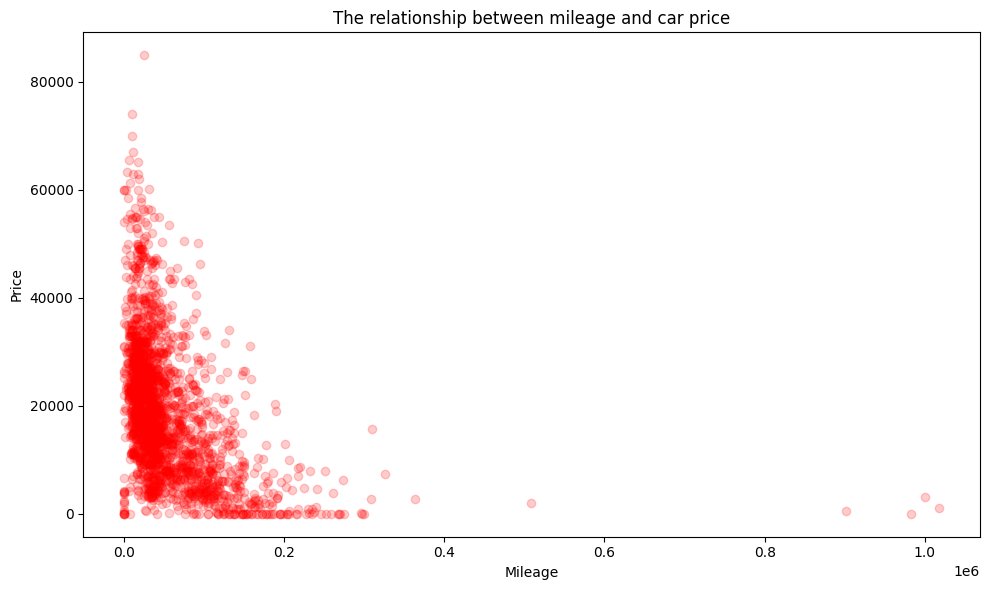

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(data['mileage'], data['price'], color='red', alpha=0.2)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('The relationship between mileage and car price')
plt.tight_layout()
plt.show()

By this chart we can observe that cars with approximately zero mileage are the most expensive ones. With higher mileage, car engines are more susceptible to faults, so as the kilometers increase, the car loses its value

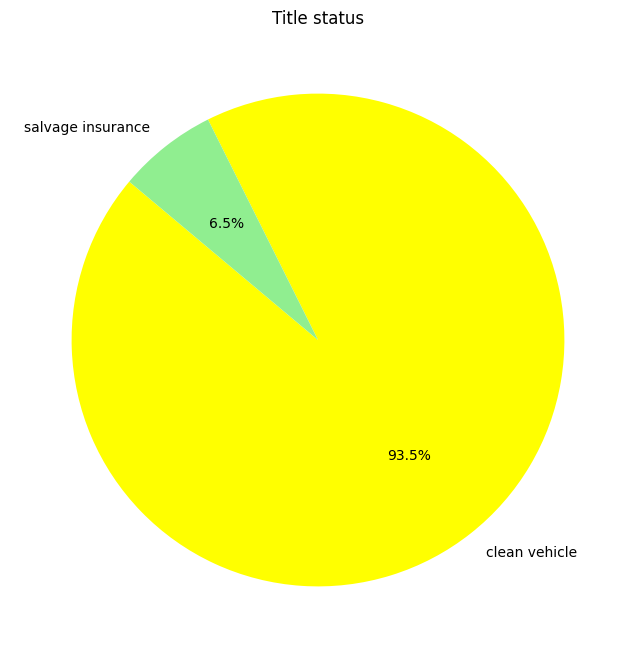

In [25]:
plt.figure(figsize=(8, 8))
title_status_counts = data['title_status'].value_counts()
plt.pie(title_status_counts, labels=title_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['yellow', 'lightgreen'])
plt.title('Title status')
plt.show()

Most of the cars are beeing named as a `clean vehicle`, which means that are almost brand new, or there was no need to repair it with time beeing. `salvage insurence` , these are cars that have already been serviced.

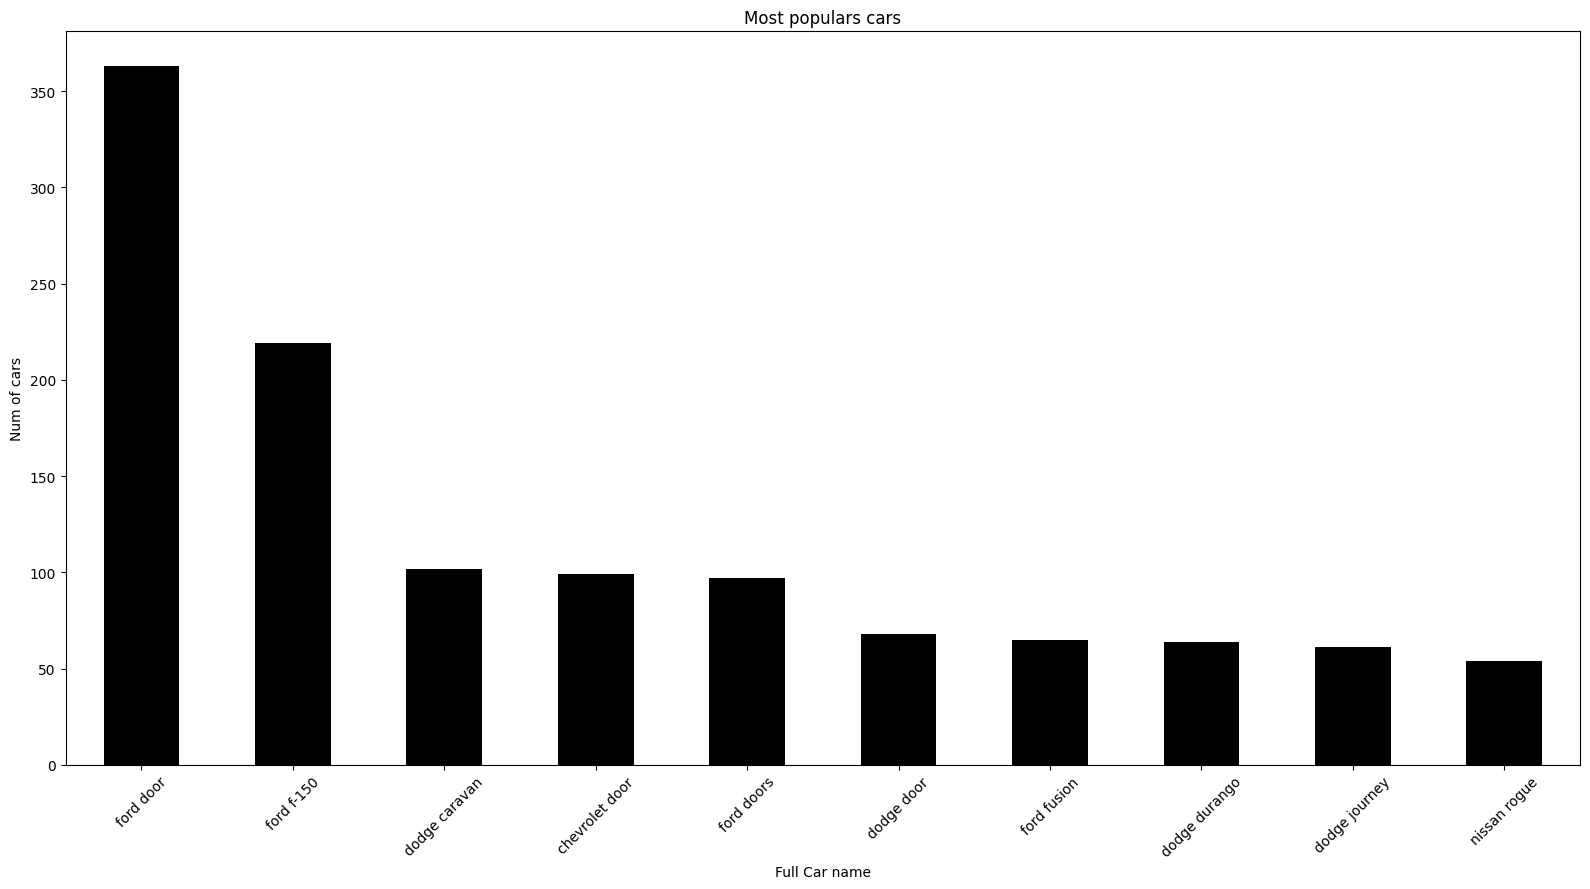

In [7]:
data['car'] = data['brand'] + ' ' + data['model']

plt.figure(figsize=(16, 9))
model_counts = data['car'].value_counts().head(10)
model_counts.plot(kind='bar', color='black')
plt.xlabel('Full Car name')
plt.ylabel('Num of cars')
plt.title('Most populars cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Combining the `brand` and `model` column we can receive a full car type which are in the dataset. We can observe that the most popular is 'ford door' and some other types of Fords and Dodges.

In [28]:
condition = lambda data: (data['price']<30000) & (data['year'] > 2016) & (data['mileage'] < 10000)
con = data.loc[condition]
con[cars_numerical_df].describe()

,price,year,mileage,lot
count,85.000000,85.000000,85.000000,8.500000e+01
mean,19527.682353,2018.729412,6184.670588,1.676927e+08
std,7521.416087,0.762019,3312.178935,1.363073e+05
min,25.000000,2017.000000,0.000000,1.671292e+08
25%,16800.000000,2018.000000,4512.000000,1.676542e+08
50%,22500.000000,2019.000000,6821.000000,1.677431e+08
75%,23500.000000,2019.000000,8985.000000,1.677790e+08
max,29988.000000,2020.000000,9910.000000,1.678014e+08


We can see that there is 85 records that fit our searching points, `price` has to be less than 30k, `year` of prodution has to be younger than 2016, and `mileage` less than 100k.